In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile


In [ ]:
zip = zipfile.ZipFile('archive.zip')
zip.extractall()

In [ ]:
df=pd.read_csv("Life Expectancy Data.csv")
df['LE']=df['Life expectancy ']
df['GDP']=round(df['GDP'])
df['Alcohol']=round(df['Alcohol'])
df[' BMI ']=round(df[' BMI '])
df[' HIV/AIDS']=round(df[' HIV/AIDS'])
df['Schooling']=round(df['Schooling'])
df[' thinness  1-19 years']=round(df[' thinness  1-19 years'])
df[' thinness 5-9 years']=round(df[' thinness 5-9 years'])
df=df.drop(columns=['Year','Life expectancy ','Income composition of resources'])
df=df.dropna(how='any')

df


,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Schooling,LE
0,Afghanistan,Developing,263.0,62,0.0,71.279624,65.0,1154,19.0,83,6.0,8.16,65.0,0.0,584.0,33736494.0,17.0,17.0,10.0,65.0
1,Afghanistan,Developing,271.0,64,0.0,73.523582,62.0,492,19.0,86,58.0,8.18,62.0,0.0,613.0,327582.0,18.0,18.0,10.0,59.9
2,Afghanistan,Developing,268.0,66,0.0,73.219243,64.0,430,18.0,89,62.0,8.13,64.0,0.0,632.0,31731688.0,18.0,18.0,10.0,59.9
3,Afghanistan,Developing,272.0,69,0.0,78.184215,67.0,2787,18.0,93,67.0,8.52,67.0,0.0,670.0,3696958.0,18.0,18.0,10.0,59.5
4,Afghanistan,Developing,275.0,71,0.0,7.097109,68.0,3013,17.0,97,68.0,7.87,68.0,0.0,64.0,2978599.0,18.0,18.0,10.0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,723.0,27,4.0,0.000000,68.0,31,27.0,42,67.0,7.13,65.0,34.0,454.0,12777511.0,9.0,9.0,9.0,44.3
2934,Zimbabwe,Developing,715.0,26,4.0,0.000000,7.0,998,27.0,41,7.0,6.52,68.0,37.0,453.0,12633897.0,10.0,10.0,10.0,44.5
2935,Zimbabwe,Developing,73.0,25,4.0,0.000000,73.0,304,26.0,40,73.0,6.53,71.0,40.0,57.0,125525.0,1.0,1.0,10.0,44.8
2936,Zimbabwe,Developing,686.0,25,2.0,0.000000,76.0,529,26.0,39,76.0,6.16,75.0,42.0,549.0,12366165.0,2.0,2.0,10.0,45.3


In [ ]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()
df['Status']=le.fit_transform(df['Status'])
df['Country']=le1.fit_transform(df['Country'])
df

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Schooling,LE
0,0,1,263.0,62,0.0,71.279624,65.0,1154,19.0,83,6.0,8.16,65.0,0.0,584.0,33736494.0,17.0,17.0,10.0,65.0
1,0,1,271.0,64,0.0,73.523582,62.0,492,19.0,86,58.0,8.18,62.0,0.0,613.0,327582.0,18.0,18.0,10.0,59.9
2,0,1,268.0,66,0.0,73.219243,64.0,430,18.0,89,62.0,8.13,64.0,0.0,632.0,31731688.0,18.0,18.0,10.0,59.9
3,0,1,272.0,69,0.0,78.184215,67.0,2787,18.0,93,67.0,8.52,67.0,0.0,670.0,3696958.0,18.0,18.0,10.0,59.5
4,0,1,275.0,71,0.0,7.097109,68.0,3013,17.0,97,68.0,7.87,68.0,0.0,64.0,2978599.0,18.0,18.0,10.0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,1,723.0,27,4.0,0.000000,68.0,31,27.0,42,67.0,7.13,65.0,34.0,454.0,12777511.0,9.0,9.0,9.0,44.3
2934,132,1,715.0,26,4.0,0.000000,7.0,998,27.0,41,7.0,6.52,68.0,37.0,453.0,12633897.0,10.0,10.0,10.0,44.5
2935,132,1,73.0,25,4.0,0.000000,73.0,304,26.0,40,73.0,6.53,71.0,40.0,57.0,125525.0,1.0,1.0,10.0,44.8
2936,132,1,686.0,25,2.0,0.000000,76.0,529,26.0,39,76.0,6.16,75.0,42.0,549.0,12366165.0,2.0,2.0,10.0,45.3


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
X[:,15:16]

array([[33736494.],
       [  327582.],
       [31731688.],
       ...,
       [  125525.],
       [12366165.],
       [12222251.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X_train[:,15:16] = norm.fit_transform(X_train[:, 15:16])
X_test[:, 15:16] = norm.fit_transform(X_test[:, 15:16])

In [ ]:
X_train[:,15:16]

array([[-0.19819294],
       [-0.17588743],
       [-0.18977032],
       ...,
       [-0.12495638],
       [ 2.3785142 ],
       [-0.19124929]])

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
history=ann.fit(X_train, y_train, batch_size=32, epochs=2500)
ann.save("LE.h5")

Streaming output truncated to the last 5000 lines.
Epoch 1/2500
42/42 [==============================] - 0s 2ms/step - loss: 14.1623
Epoch 2/2500
42/42 [==============================] - 0s 2ms/step - loss: 8.7044
Epoch 3/2500
42/42 [==============================] - 0s 2ms/step - loss: 8.8328
Epoch 4/2500
42/42 [==============================] - 0s 2ms/step - loss: 8.5665
Epoch 5/2500
42/42 [==============================] - 0s 2ms/step - loss: 9.9168
Epoch 6/2500
42/42 [==============================] - 0s 2ms/step - loss: 7.4525
Epoch 7/2500
42/42 [==============================] - 0s 2ms/step - loss: 27.7922
Epoch 8/2500
42/42 [==============================] - 0s 2ms/step - loss: 13.8695
Epoch 9/2500
42/42 [==============================] - 0s 2ms/step - loss: 10.4454
Epoch 10/2500
42/42 [==============================] - 0s 2ms/step - loss: 9.1489
Epoch 11/2500
42/42 [==============================] - 0s 3ms/step - loss: 8.1885
Epoch 12/2500
42/42 [==============================]

Saved Model & Graph to disk


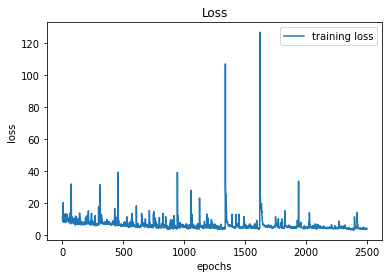

In [ ]:
plt.figure(0)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

In [ ]:
model = tf.keras.models.load_model('LE.h5')
print("Loaded model from disk")


Loaded model from disk


In [ ]:
y_pred = model.predict(X_test)
y_pred=np.round(y_pred)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[79.  78. ]
 [72.  73. ]
 [72.  69.7]
 [74.  73.9]
 [76.  75. ]
 [71.  68.1]
 [66.  65.9]
 [70.  65.4]
 [68.  67.5]
 [62.  61.4]
 [71.  72. ]
 [74.  76.2]
 [60.  58. ]
 [79.  78. ]
 [64.  62.8]
 [67.  73. ]
 [47.  47.8]
 [75.  74.9]
 [67.  68. ]
 [76.  71.2]
 [75.  78.1]
 [73.  72.7]
 [75.  75.1]
 [74.  74.2]
 [73.  73. ]
 [50.  49.1]
 [64.  65. ]
 [78.  78.7]
 [51.  52.4]
 [73.  74.4]
 [47.  48.1]
 [70.  71. ]
 [76.  73.9]
 [71.  71.1]
 [72.  71.4]
 [59.  52. ]
 [73.  77. ]
 [72.  72.7]
 [67.  63.3]
 [79.  78.2]
 [51.  54.8]
 [81.  82. ]
 [73.  72.5]
 [69.  67.3]
 [70.  67.3]
 [81.  80. ]
 [66.  66.8]
 [73.  71.6]
 [68.  72.8]
 [73.  74.9]
 [72.  72.2]
 [70.  69.9]
 [72.  71.5]
 [76.  76.3]
 [72.  74.1]
 [78.  76.5]
 [55.  55.3]
 [73.  71.6]
 [74.  75.9]
 [73.  72.5]
 [74.  74.1]
 [62.  58.1]
 [82.  79.9]
 [69.  68. ]
 [70.  69.5]
 [75.  73.8]
 [48.  49.2]
 [68.  65.1]
 [81.  79.5]
 [72.  72.8]
 [77.  74.9]
 [72.  73.3]
 [79.  78.8]
 [66.  68.3]
 [57.  57.5]
 [70.  68.7]
 [57.  53.4]

In [ ]:
from sklearn.metrics import r2_score
print("Accuracy Score for the algorithm=>{}%".format(round(r2_score(y_test,y_pred)*100),2))

Accuracy Score for the algorithm=>72%
